In [3]:
import os, sys
sys.path.append(r'libraries')
import LOTlib3
import numpy as np
from IPython.display import Image
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
import pandas as pd

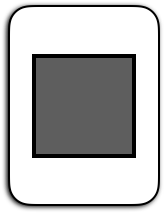

In [2]:
img_folder = '../experiment/static/images/'
stims = ['stim00',
        'stim01',
        'stim02',
        'stim03',
        'stim04',
        'stim05',
        'stim06',
        'stim07'
        ]
Image(filename= img_folder+stims[0]+".png") 

In [3]:
# Problem types
def typeI(stim):
    return stim % 2
def typeII(stim):
    labels = [0,1,1,0,0,1,1,0]
    return(labels[stim])
def typeIII(stim):
    labels = [1,0,1,0,1,1,0,0]
    return(labels[stim])
def typeIV(stim):
    labels = [1,1,1,0,1,0,0,0]
    return(labels[stim])
def typeV(stim):
    labels = [1,0,1,0,1,0,0,1]
    return(labels[stim])
def typeVI(stim):
    labels = [1,0,0,1,0,1,1,0]
    return(labels[stim])

catfuns = [typeI, typeII, typeIII, typeIV, typeV, typeVI]

In [4]:
# SHJ counterbalancing tools as written in javascript by crump/mcdonnell/gureckis and translated to python by me pam

# // We want to be able to alias the order of stimuli to a single number which
# // can be stored and which can easily replicate a given stimulus order.
# /* Extra details: arr is 3 digits which together would be the binary version of decimal number 0 thru 7.
#    E.g., arr = [0,1,0] is binary for decimal 2.
#    Ordernum is either 0 or 1. 
# */
def changeorder(arr, ordernum):
    thisorder = ordernum
    shufflelocations = []
    
    for i in range(len(arr)):
        shufflelocations.append(i); # Now shufflelocations = [0,1,2]
    
    for i in reversed(range(len(arr))): # i=2,1,0
        loci = shufflelocations[i]
        locj = shufflelocations[int(thisorder%(i+1))] # [0, 1] modulo [3, 2, 1]
        # Note that 0 mod anything is 0
        # whereas 1%3=1, 1%2=1, 1%1=0
        thisorder = np.floor(thisorder/(i+1)) # for i=2,1,0 then thisorder=0,0,1 for ordernum=1, and 0,0,0 otherwise
        tempi = arr[loci]
        tempj = arr[locj]
        arr[loci] = tempj
        arr[locj] = tempi
    
    return arr

# // Stimulus counterbalancer
def getstim(theorystim,condition):
    assert theorystim < 8, "Stim >=8 ("+theorystim+")"
    assert theorystim >= 0, "Stim less than 0 ("+theorystim+")"
    flippedstim = theorystim^condition['dimvals'] # Here the stim identities are flipped
#         /* Detail on the above line: ^ is bitwise XOR operator. 
#         / dimvals is also between 0 and 7, and theorystim is between 0 and 7 inclusive. 
#         / When dimvals is 0, flippedstim will be the same decimal number as theorystim.
#         / When dimvals is 1, flippedstim will swap 0 with 1 and vice versa, 
#         / 2 with 3 and vice versa,
#         / 4 with 5 et,
#         / 6 with 7. 
#         / So we have these groups [0,1] [2,3] [4,5] [6,7] where flippedstim will be the 
#         / partner of the original value of theorystim IF dimvals is 1. 
#         */
    assert flippedstim <8, "Agh"  # This shouldnt happen
    bits = []
    for i in range(3):
        if flippedstim&(2**i): # if this is nonzero
            bits.append(1)
        else:
            bits.append(0)
#         /* Ampersand & is bitwise AND operator.
#             note: flippedstim is between 0 and 7 inclusive
#             note: Math.pow(2,i) == 2**i and 0<i<3 so the expression has possible decimal values 1,2,4 (in binary, 1, 10, 100)
#             x & 1 returns 1 for odd numbers x=[1,3,5,7] else 0
#             x & 2 returns 2 for x=[2,3,6,7] else 0
#             x & 4 returns 4 for x=[4,5,6,7] else 0
#             The ? 1:0 portion just means change any "1,2,4" result to simply 1, else 0 
#            SO, bits contains the category (0 or 1) of the stimulus under these three rules (right?)
#             e.g., for 
#             x=0 bits=[0,0,0]; x=1 bits=[1,0,0]
#             x=2 bits=[0,1,0]; x=3 bits=[1,1,0]
#             x=4 bits=[0,0,1]; x=5 bits=[1,0,1]
#             x=6 bits=[0,1,1]; x=7 bits=[1,1,1]
#         */

    newbits = changeorder(bits, condition['dimorder']) # in javascript, no new var here bc function works in-place

    multiples = [1, 2, 4]
    ret = 0
    for i in range(3):
        ret += multiples[i] * newbits[i]; # Here we convert from binary [bits] to decimal
    
    return ret

[0, 1, 2, 3, 4, 5, 6, 7]
['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B']
['stim00', 'stim04', 'stim01', 'stim05', 'stim02', 'stim06', 'stim03', 'stim07']


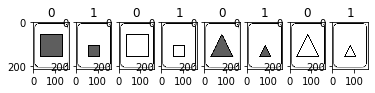

In [6]:
# actual params
condition = {}
condition['rule'] = 0
condition['dimvals'] = 0
condition['dimorder'] = 0
condition['nRepeats'] = 1

# # check that params follow rules
# assert condition['dimvals'] in [0,1,2,3,4,5,6,7], "dimvals should be int between 0 and 8"
# assert condition['dimorder'] in [0,1,2,3,4,5], "dimorder should be int between 0 and 6"
# assert condition['rule'] in [0,1,2,3,4,5], "rule should be an int between 0 and 5 for the six SHJ problem types"

catfun = catfuns[condition['rule']];
shapes = ['square','triangle']
colors = ['black','white']
sizes = ['small','large']

allstims = [0,1,2,3,4,5,6,7]

testcardsleft = allstims*condition['nRepeats']
# random.seed(17)
# random.shuffle(testcardsleft)
print(testcardsleft)
groupBool = [catfun(a) for a in range(8)]
groupLabel=[]
for ii in groupBool:
    if groupBool[ii]:
        groupLabel.append("B")
    else:
        groupLabel.append("A")
print(groupLabel)

stimcardspresented = []

for ii in range(len(testcardsleft)):
    prescard = testcardsleft[ii]
    stim = stims[getstim(prescard,condition)]
    stimcardspresented.append(stim)
    img = mpimg.imread(img_folder+stim+".png")
    plt.subplot(1,8,ii+1,title=catfun(prescard))
    plt.imshow(img)  
#     plt.show()
#     time.sleep(2)

print(stimcardspresented)

In [20]:
# TODO: Running through this loop fills a dataframe and then we will assess that dataframe for number and 
# type and frequency of unique entries

# actual params
condition = {key: None for key in ["rule","dimvals","dimorder"]}

# function that converts a boolean [False, True] to [A, B] respectively
convert_bool_to_AB = lambda x: 'B' if x==True else 'A'

nrules = 6 
NUMDIMS = 3
NDIMFLIPS = 1<<NUMDIMS  # 3 features each need 1 bit of entropy, 1<<3=8 (left shift bitwise operator)
# note: left shift x<<y is effectively (x*2)**y, so here (1*2)**3 = 2**3 = 8
def factorial(x):
    if x<=1: return x
    else: return x * factorial(x-1)
NDIMORDERS = factorial(NUMDIMS) # different orders the stims could be in 3*2*1=6
NUMCOUNTERS = NDIMFLIPS * NDIMORDERS # 8*6=48


# cols = ["rule","dimvals","dimorder",
#         "stim00","stim01","stim02","stim03",
#         "stim04","stim05","stim06","stim07"]
cols = list(condition.keys()) + stims + ["catfun","seq"] # to get the above
allrows = [] # will be list of dicts with cols as keys to be turned into df

for rule in range(nrules):
    condition['rule']=rule
    for i in range(NDIMFLIPS):
        for j in range(NDIMORDERS):
            condition['dimvals'] = i
            condition['dimorder'] = j
            
            newrow = {key: None for key in cols} #initialize the new row (dictionary)
            newrow.update(condition) # now newrow has rule, dimvals, and dimorder set appropriately
            
            catfun = catfuns[condition['rule']];
            
            # for our eight cards
            seq = ''
            for card in range(len(stims)):
                displayed_stim = stims[getstim(card,condition)]
                categoryBool = catfun(card)
                newrow[displayed_stim] = convert_bool_to_AB(categoryBool)
                seq += convert_bool_to_AB(categoryBool)
            
            newrow["catfun"]=seq
            
            allrows.append(newrow)
            
df = pd.DataFrame(allrows,columns=cols)


In [21]:
pd.set_option('display.max_rows', 500)
display(df)

,rule,dimvals,dimorder,stim00,stim01,stim02,stim03,stim04,stim05,stim06,stim07,catfun
0,0,0,0,A,A,A,A,B,B,B,B,ABABABAB
1,0,0,1,A,A,B,B,A,A,B,B,ABABABAB
2,0,0,2,A,A,B,B,A,A,B,B,ABABABAB
3,0,0,3,A,A,A,A,B,B,B,B,ABABABAB
4,0,0,4,A,B,A,B,A,B,A,B,ABABABAB
5,0,0,5,A,B,A,B,A,B,A,B,ABABABAB
6,0,1,0,B,B,B,B,A,A,A,A,ABABABAB
7,0,1,1,B,B,A,A,B,B,A,A,ABABABAB
8,0,1,2,B,B,A,A,B,B,A,A,ABABABAB
9,0,1,3,B,B,B,B,A,A,A,A,ABABABAB


In [19]:
df.rule.value_counts()

5    48
4    48
3    48
2    48
1    48
0    48
Name: rule, dtype: int64

In [41]:
for i, row in df.iterrows():
    seq = [row[x] for x in stims]
    seqstr = "".join(seq)
    df.loc[i,"seq"] = seqstr


In [42]:
df

,rule,dimvals,dimorder,stim00,stim01,stim02,stim03,stim04,stim05,stim06,stim07,catfun,seq
0,0,0,0,A,A,A,A,B,B,B,B,ABABABAB,AAAABBBB
1,0,0,1,A,A,B,B,A,A,B,B,ABABABAB,AABBAABB
2,0,0,2,A,A,B,B,A,A,B,B,ABABABAB,AABBAABB
3,0,0,3,A,A,A,A,B,B,B,B,ABABABAB,AAAABBBB
4,0,0,4,A,B,A,B,A,B,A,B,ABABABAB,ABABABAB
5,0,0,5,A,B,A,B,A,B,A,B,ABABABAB,ABABABAB
6,0,1,0,B,B,B,B,A,A,A,A,ABABABAB,BBBBAAAA
7,0,1,1,B,B,A,A,B,B,A,A,ABABABAB,BBAABBAA
8,0,1,2,B,B,A,A,B,B,A,A,ABABABAB,BBAABBAA
9,0,1,3,B,B,B,B,A,A,A,A,ABABABAB,BBBBAAAA


In [75]:
unique_conditions = df.groupby("rule")["seq"].unique().to_dict()

for key, val in unique_conditions.items():
    print("\nRULE: " + str(key))
    print(str(len(val)) + " unique sequence strings.")
    print("Total number of conditions with this rule is "+ str(len(df.loc[df["rule"]==key])) + ".")
    for cond in val:
        print("condition " + cond + ": " + str(len(df.loc[(df["rule"]==key) & (df["seq"]==cond)])) + " instances.")


RULE: 0
6 unique sequence strings.
Total number of conditions with this rule is 48.
condition AAAABBBB: 8 instances.
condition AABBAABB: 8 instances.
condition ABABABAB: 8 instances.
condition BBBBAAAA: 8 instances.
condition BBAABBAA: 8 instances.
condition BABABABA: 8 instances.

RULE: 1
6 unique sequence strings.
Total number of conditions with this rule is 48.
condition ABABBABA: 8 instances.
condition AABBBBAA: 8 instances.
condition ABBAABBA: 8 instances.
condition BABAABAB: 8 instances.
condition BBAAAABB: 8 instances.
condition BAABBAAB: 8 instances.

RULE: 2
24 unique sequence strings.
Total number of conditions with this rule is 48.
condition BBBAAABA: 2 instances.
condition BBABBAAA: 2 instances.
condition BBAABABA: 2 instances.
condition BBBAABAA: 2 instances.
condition BABBBAAA: 2 instances.
condition BABABBAA: 2 instances.
condition AABABBBA: 2 instances.
condition ABBBAABA: 2 instances.
condition AABBBABA: 2 instances.
condition ABAABBBA: 2 instances.
condition ABBBABAA

In [21]:
random.choice(range(5))

1